In [ ]:
# Importing essential Libraries

# Importing libraries for data manipulation and numerical operations
import pandas as pd     # For data manipulation and analysis (DataFrames, CSV reading, etc.)
import numpy as np      # For numerical operations (arrays, matrices, mathematical functions)
import matplotlib.pyplot as plt   # For visualisation


# Importing libraries for data preprocessing
from sklearn.model_selection import train_test_split   # To split dataset into training and testing subsets
from sklearn.preprocessing import LabelEncoder         # To convert categorical labels into numerical form

import tensorflow as tf
from tensorflow.keras.regularizers import l2
# Importing libraries for text processing
from tensorflow.keras.preprocessing.text import Tokenizer     # To convert text into integer sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences  # To pad sequences to a fixed length

# Importing modules for building the RNN model
from tensorflow.keras.models import Sequential   # To define the sequential neural network architecture
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense   # Neural network layers: Embedding, RNN, Dense

# Importing library for saving and loading models or objects
import pickle   # To serialize (save) and deserialize (load) Python objects (e.g., models, tokenizers)


In [ ]:
# Phase1 : Dataset Loading

# Load the classification dataset (uploaded CSV)
classification_df = pd.read_csv('/content/educational_text_classification.csv')
print('Classification DataFrame columns:', classification_df.columns)
texts = classification_df[classification_df.columns[0]].values
labels = classification_df['Category'].values

# Load the next word generation dataset (uploaded CSV)
generation_df = pd.read_csv('/content/next_word_generation.csv')
print('Generation DataFrame columns:', generation_df.columns)
science_corpus = ' '.join(generation_df[generation_df.columns[0]].str.lower().values)

print('Datasets loaded successfully.')

Classification DataFrame columns: Index(['Text', 'Category'], dtype='object')
Generation DataFrame columns: Index(['Input_Sequence', 'Next_Word'], dtype='object')
Datasets loaded successfully.


In [ ]:
# Phase 2: Text Preprocessing

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Text preprocessing for Classification
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save tokenizers and label encoder
with open('/content/sample_data/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('/content/sample_data/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print('Text classification data preprocessed and ready for model training.')

# Preprocessing for Generation Model
gen_tokenizer = Tokenizer()
gen_tokenizer.fit_on_texts([science_corpus])
total_words = len(gen_tokenizer.word_index) + 1

# Check if science_corpus is empty or too short
if len(science_corpus.strip()) == 0:
    raise ValueError("The science corpus is empty. Please check the input dataset.")

# Create training sequences
input_sequences = []
for line in science_corpus.split('.'):
    line = line.strip()  # Clean up any unnecessary spaces
    if len(line) == 0:  # Skip empty lines
        continue
    token_list = gen_tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Check if input_sequences is populated
if not input_sequences:
    raise ValueError("No valid input sequences were generated. Please check the corpus data.")

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and labels
X_gen = input_sequences[:, :-1]
y_gen = input_sequences[:, -1]

print('Text generation data preprocessed and ready for model training.')

Text classification data preprocessed and ready for model training.
Text generation data preprocessed and ready for model training.


#Task 1. Educational Text Classification Model


Training for fold 1...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.4782 - loss: 1.5521 - val_accuracy: 1.0000 - val_loss: 0.3255 - learning_rate: 3.0000e-04
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.9960 - loss: 0.3061 - val_accuracy: 1.0000 - val_loss: 0.1628 - learning_rate: 3.0000e-04
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9994 - loss: 0.1526 - val_accuracy: 1.0000 - val_loss: 0.0888 - learning_rate: 3.0000e-04
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 1.0000 - loss: 0.0860 - val_accuracy: 1.0000 - val_loss: 0.0561 - learning_rate: 3.0000e-04
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9998 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss: 0.0408 - learning_rate: 3.0000e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 1.0000 - loss: 0.0420 - val_accuracy: 1.0000 - val_loss: 0.0322 - learning_rate: 3.0000e-04
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accurac

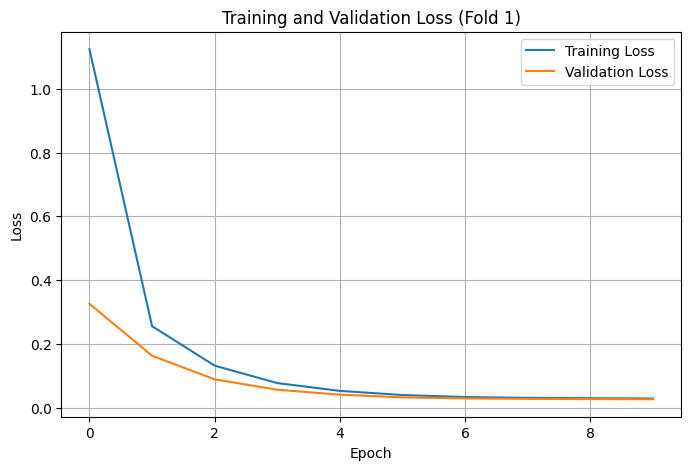

Fold 1 - Validation Accuracy: 1.0000

Training for fold 2...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.4733 - loss: 1.5528 - val_accuracy: 1.0000 - val_loss: 0.3228 - learning_rate: 3.0000e-04
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9982 - loss: 0.2774 - val_accuracy: 1.0000 - val_loss: 0.1364 - learning_rate: 3.0000e-04
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9998 - loss: 0.1241 - val_accuracy: 1.0000 - val_loss: 0.0694 - learning_rate: 3.0000e-04
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 1.0000 - loss: 0.0663 - val_accuracy: 1.0000 - val_loss: 0.0423 - learning_rate: 3.0000e-04
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 1.0000 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 0.0309 - learning_rate: 3.0000e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 1.0000 - loss: 0.0320 - val_accuracy: 1.0000 - val_loss: 0.0250 - learning_rate: 3.

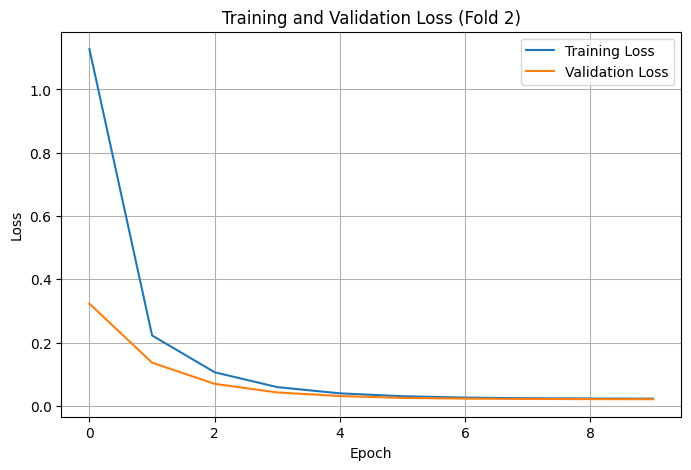

Fold 2 - Validation Accuracy: 1.0000

Training for fold 3...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.4270 - loss: 1.6322 - val_accuracy: 1.0000 - val_loss: 0.3105 - learning_rate: 3.0000e-04
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9994 - loss: 0.2829 - val_accuracy: 1.0000 - val_loss: 0.1451 - learning_rate: 3.0000e-04
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9995 - loss: 0.1324 - val_accuracy: 1.0000 - val_loss: 0.0717 - learning_rate: 3.0000e-04
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9998 - loss: 0.0698 - val_accuracy: 1.0000 - val_loss: 0.0425 - learning_rate: 3.0000e-04
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 1.0000 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0308 - learning_rate: 3.0000e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9999 - loss: 0.0327 - val_accuracy: 1.0000 - val_loss: 0.0248 - learning_rate: 3.

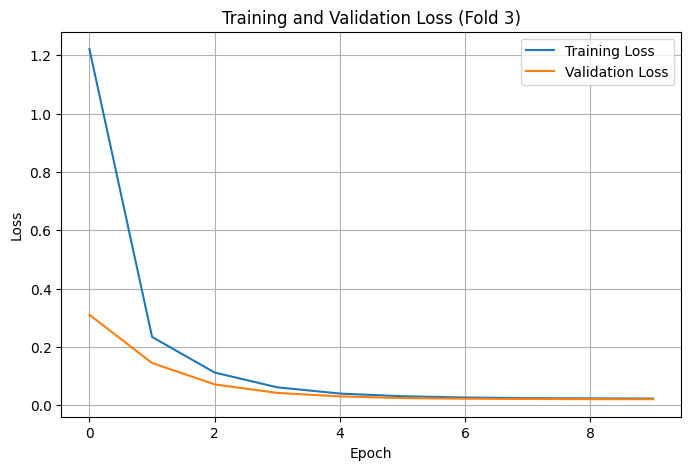

Fold 3 - Validation Accuracy: 1.0000

Training for fold 4...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.4452 - loss: 1.6002 - val_accuracy: 1.0000 - val_loss: 0.3299 - learning_rate: 3.0000e-04
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9988 - loss: 0.3029 - val_accuracy: 1.0000 - val_loss: 0.1646 - learning_rate: 3.0000e-04
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9993 - loss: 0.1497 - val_accuracy: 1.0000 - val_loss: 0.0828 - learning_rate: 3.0000e-04
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9999 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0475 - learning_rate: 3.0000e-04
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9998 - loss: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0331 - learning_rate: 3.0000e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.9996 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 0.0275 - learning_rate: 3.

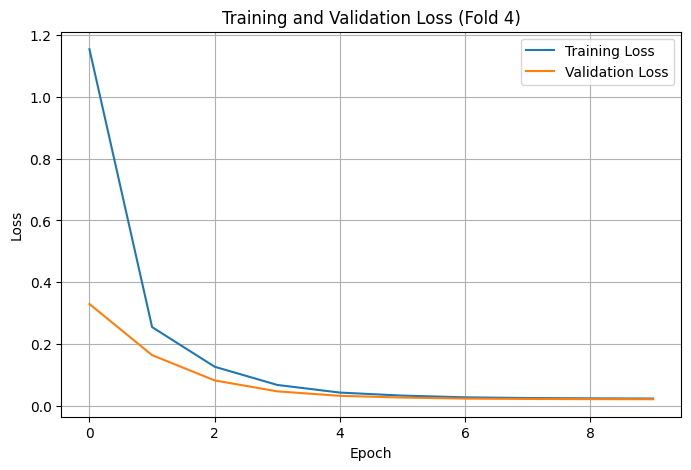

Fold 4 - Validation Accuracy: 1.0000

Training for fold 5...
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 78ms/step - accuracy: 0.3857 - loss: 1.6885 - val_accuracy: 1.0000 - val_loss: 0.3198 - learning_rate: 3.0000e-04
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 38s 70ms/step - accuracy: 0.9965 - loss: 0.2968 - val_accuracy: 1.0000 - val_loss: 0.1507 - learning_rate: 3.0000e-04
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9999 - loss: 0.1377 - val_accuracy: 1.0000 - val_loss: 0.0785 - learning_rate: 3.0000e-04
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9996 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.0467 - learning_rate: 3.0000e-04
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 1.0000 - loss: 0.0462 - val_accuracy: 1.0000 - val_loss: 0.0326 - learning_rate: 3.0000e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.9993 - loss: 0.0355 - val_accuracy: 1.0000 - val_loss: 0.0262 - learning_rate: 3.

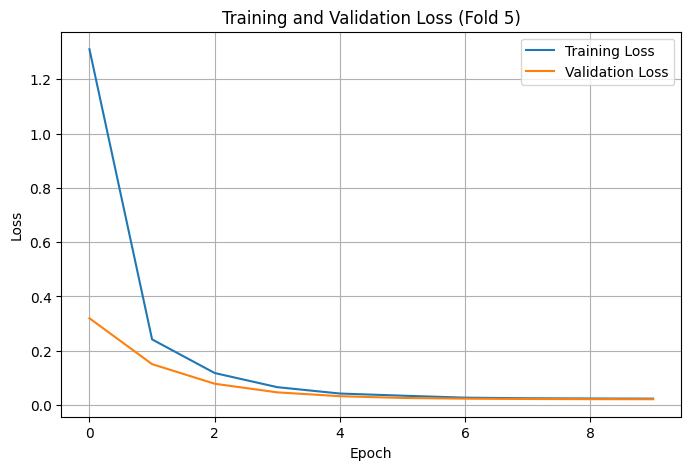

Fold 5 - Validation Accuracy: 1.0000

Evaluating on the Test Set:

Final Test Accuracy: 1.0000
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


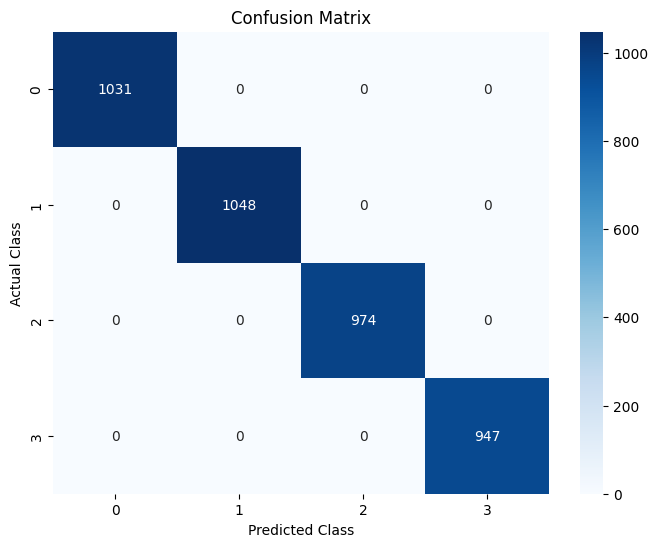


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1031
           1       1.00      1.00      1.00      1048
           2       1.00      1.00      1.00       974
           3       1.00      1.00      1.00       947

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch > 5:
        lr = lr * 0.5
    return lr

# Early stopping with increased patience
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Class Weight Adjustment for imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Data Leakage Check (Shuffle and re-split if needed)
np.random.seed(42)
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train, y_train = X_train[indices], y_train[indices]

# Define the model with optimized architecture and regularization
def create_model():
    model = Sequential([
        Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len),
        Bidirectional(GRU(64, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)),
        LayerNormalization(),
        Bidirectional(GRU(32, dropout=0.4, recurrent_dropout=0.4)),
        Dense(16, activation='relu', kernel_regularizer=l2(0.02)),
        Dense(len(np.unique(y)), activation="softmax")
    ])
    optimizer = Adam(learning_rate=0.0003)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# K-Fold Cross-Validation
kf = KFold(n_splits=5)

fold_no = 1
for train_index, val_index in kf.split(X_train):
    print(f"\nTraining for fold {fold_no}...")
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train[train_index], y_train[val_index]

    model = create_model()
    history = model.fit(X_tr, y_tr,
                        epochs=10,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stop, LearningRateScheduler(lr_scheduler)],
                        class_weight=class_weight_dict,
                        shuffle=True,
                        verbose=1)

    # Plot training and validation loss for analysis
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss (Fold {fold_no})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold_no} - Validation Accuracy: {val_accuracy:.4f}")
    fold_no += 1

# Final Evaluation
print("\nEvaluating on the Test Set:")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix visualization
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=np.unique(y).astype(str)))


#Prediction

In [ ]:
# List of example texts

new_texts = [
    "The acceleration due to gravity on Earth is approximately 9.8 m/s².",
    "The Renaissance was a period of cultural, artistic, and scientific rebirth.",
    "In algebra, solving for x involves isolating the variable.",
    "Photosynthesis is the process by which plants convert sunlight into energy."
]

# Tokenize and pad the sequences
sequences = tokenizer.texts_to_sequences(new_texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Predict the classes
predictions = model.predict(padded_sequences)
predicted_classes = np.argmax(predictions, axis=1)

# Display the results
class_labels = {0: "Math", 1: "Science", 2: "History", 3: "English"}
for i, text in enumerate(new_texts):
    print(f"Text: '{text}' --> Predicted Class: {class_labels[predicted_classes[i]]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Text: 'The acceleration due to gravity on Earth is approximately 9.8 m/s².' --> Predicted Class: Math
Text: 'The Renaissance was a period of cultural, artistic, and scientific rebirth.' --> Predicted Class: Science
Text: 'In algebra, solving for x involves isolating the variable.' --> Predicted Class: History
Text: 'Photosynthesis is the process by which plants convert sunlight into energy.' --> Predicted Class: Math


#Task 2: Next Word Generation (Auto-completion/Prediction)

In [ ]:
# Modified Generation Model with Regularization
generation_model = Sequential()
generation_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  # Increased embedding dim
generation_model.add(SimpleRNN(150, dropout=0.2, recurrent_dropout=0.2))  # Added regularization
generation_model.add(Dense(total_words, activation='softmax'))
generation_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Modified Training with Early Stopping
early_stop_gen = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
generation_model.fit(X_gen, y_gen, epochs=150, verbose=1, callbacks=[early_stop_gen])


def generate_text(seed_text, next_words=20, temperature=0.7):
    for _ in range(next_words):
        token_list = gen_tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = generation_model.predict(token_list, verbose=0)[0]

        # Apply temperature scaling
        predictions = np.log(predictions) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)

        predicted_index = np.random.choice(range(len(predictions)), p=predictions)
        output_word = gen_tokenizer.index_word.get(predicted_index, '')
        seed_text += ' ' + output_word
    return seed_text

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 4.4532
Epoch 2/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.0594
Epoch 3/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.0013
Epoch 4/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.8109
Epoch 5/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.5587
Epoch 6/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.2387
Epoch 7/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.0267
Epoch 8/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.7545
Epoch 9/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.5625
Epoch 10/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4025
Epoch 11/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3127
Epoch 12/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.2287
Epoch 13/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.1635
Epoch 14/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.0471
Epoch 15/150
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - lo

In [ ]:
 print(generate_text('photosynthesis is the process', 20, temperature=0.5))
# Expected output: "photosynthesis is the process by which green plants use sunlight
# to synthesize foods from carbon dioxide and water..."

photosynthesis is the process scientific study of the properties and behavior of matter its motion and behavior through space and time of reflect study
